## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')

df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df_uniq = df.user_id.unique().shape[0]
df_uniq

290584

d. The proportion of users converted.

In [78]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df.query('landing_page == "new_page"').query('group != "treatment"').shape[0]

1928

In [7]:
df[((df['landing_page'] == 'new_page') == (df['group'] == 'treatment')) == False].shape[0]

3893

f. Do any of the rows have missing values?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


There are no missing values

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == True]

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2.user_id.unique().shape[0]

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2.user_id.duplicated() == True]['user_id'].values[0]

773192

c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2.drop_duplicates(keep='first', inplace=True)

/home/dl/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [15]:
df2 = df2.reset_index()

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [79]:
p_converted = df2.converted.mean()
p_converted

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [42]:
p_control_converted = df2.query('group == "control"').converted.mean()
p_control_converted

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [37]:
p_treatment_converted = df2.query('group == "treatment"').converted.mean()
p_treatment_converted

0.11880724790277405

In [38]:
1 - p_treatment_converted

0.8811927520972259

d. What is the probability that an individual received the new page?

In [19]:
round(df2.query('landing_page == "new_page"').shape[0] / df2.shape[0], 3)

0.5

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**We don't have enough evidence. We know out of control and treatment group what proportion converted, but we don't know the proportion of new_page and old_page within. We know the overall proportion of landing pages is 0.5, but we need to find out how it is spread among groups that converted.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$ H_{0}: P_{new} - P_{old} \leq 0$

$ H_{1}: P_{new} - P_{old} > 0 $

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
p_new = df2.query('converted == 1')['user_id'].nunique() / df2['user_id'].nunique()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old = p_new

c. What is $n_{new}$?

In [22]:
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()
n_new

145310

d. What is $n_{old}$?

In [23]:
n_old = df2.query('landing_page == "old_page"')['user_id'].unique().shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.choice(df2['converted'], n_new, p_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.choice(df2['converted'], n_old, p_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
actual_diff = new_page_converted.mean() - old_page_converted.mean()
actual_diff

0.0009201260201242151

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [31]:
# Drawing samples of new_page and old_page from binomial distribution with size 10 000 
new_mean = np.random.binomial(n_new, p_new, size=10000)
old_mean = np.random.binomial(n_old, p_old, size=10000)

# appending the difference between new and old to array p_diffs
p_diffs = []
p_diffs.append(new_mean - old_mean)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

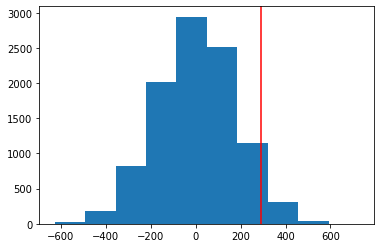

In [32]:
plt.hist(p_diffs)
plt.axvline(np.percentile(p_diffs, 95), c = 'red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [46]:
obs_diff = p_treatment_converted - p_control_converted

(p_diffs > obs_diff).mean()

0.5165

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The value we calculated in part j is called p value. If the p-value is below 0.95, it means we have no evidence, that P-new is higher than P-old, thus we fail to reject null hypothesis. This means we shouldn't expect new pages will increase convertion.** 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [47]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and converted == 1').shape[0]
convert_new = df2.query('landing_page == "new_page" and converted == 1').shape[0]
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]

In [81]:
convert_old, convert_new

(17489, 17264)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [48]:
nob = n_old+n_new

In [49]:
convert_new/n_new - convert_old/n_old

-0.0015790565976871451

In [75]:
test = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')

In [76]:
p_val = test[1]
p_val

0.905173705140591

In [77]:
z_score = test[0]
z_score

1.3116075339133115

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**p and z values tells us we do not have enough evidence to reject null hypothesis. Thus, they agree with the finding in the part j and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Binary regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [53]:
df2.head()

,index,user_id,timestamp,group,landing_page,converted
0,0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [54]:
df2[['control', 'ab_page']] = pd.get_dummies(df2['group'])

In [55]:
df2['intercept'] = 1

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [56]:
lm = sm.OLS(df2['converted'], df2[['ab_page', 'intercept']]).fit()

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [41]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.720
Date:                Sun, 07 Nov 2021   Prob (F-statistic):              0.190
Time:                        17:03:41   Log-Likelihood:                -85267.
No. Observations:              290585   AIC:                         1.705e+05
Df Residuals:                  290583   BIC:                         1.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0016      0.001     -1.312      0.190      -0.004       0.001
intercept      0.1204      0.001    141.407      0.000       0.119       0.122
==============================================================================
Omnibus:                   125554.337   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414318.532
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

P value of ab_page is 0.190, which mean we have no statistical evidence that this variable is significant. This p value is different compared to what we calculated in Part II, because we calculated it for different variables. I was asked to use groups in this case, while was asked to use landing_pages in part II.  

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Usually outcome is affected by multiple factors. Adding other factors might give us better explenation, although the multiple factors shouldn't have correlation to each other, which could lead to false interpretations. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [57]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [58]:
df_new['country'].unique()

array(['US', 'UK', 'CA'], dtype=object)

In [59]:
### Create the necessary dummy variables
df_new[['ca', 'uk', 'us']] = pd.get_dummies(df_new['country'])

In [60]:
df_new.head()

,country,index,timestamp,group,landing_page,converted,control,ab_page,intercept,ca,uk,us
user_id,,,,,,,,,,,,
630000,US,63114,2017-01-19 06:26:06.548941,treatment,new_page,0,0,1,1,0,0,1
630001,US,103873,2017-01-16 03:16:42.560309,treatment,new_page,1,0,1,1,0,0,1
630002,US,205236,2017-01-19 19:20:56.438330,control,old_page,0,1,0,1,0,0,1
630003,US,247344,2017-01-12 10:09:31.510471,treatment,new_page,0,0,1,1,0,0,1
630004,US,242283,2017-01-18 20:23:58.824994,treatment,new_page,0,0,1,1,0,0,1


In [92]:
df_new['intercept'] = 1
lm1 = sm.OLS(df_new['converted'], df_new[['intercept', 'us', 'uk']]).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.605
Date:                Tue, 09 Nov 2021   Prob (F-statistic):              0.201
Time:                        01:02:13   Log-Likelihood:                -85266.
No. Observations:              290585   AIC:                         1.705e+05
Df Residuals:                  290582   BIC:                         1.706e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1153      0.003     42.792      0.000       0.110       0.121
us             0.0042      0.003      1.516      0.130      -0.001       0.010
uk             0.0053      0.003      1.787      0.074      -0.001       0.011
==============================================================================
Omnibus:                   125553.266   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414311.221
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         9.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [87]:
y, X = dmatrices('converted ~ intercept + ab_page + us + uk', df_new, return_type= 'dataframe')

In [65]:
### Fit Your Linear Model And Obtain the Results
df3 = df_new

In [86]:
vf = pd.DataFrame()

In [67]:
# adding new columns with interaction between us and ab_page, uk and ab_page 
df3['us_ab_page'] = df3.ab_page * df3.us
df3['uk_ab_page'] = df3.ab_page * df3.uk

In [88]:
vf['VIF Factor'] = [vif(X.values, i) for i in range(X.shape[1])]
vf['Features'] = X.columns 

/home/dl/.local/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [72]:
# OLS model with new columns
df3_lm = sm.OLS(df3.converted, df3[['intercept', 'us_ab_page', 'uk_ab_page']])
df3_result = df3_lm.fit()
df3_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.152
Date:                Mon, 08 Nov 2021   Prob (F-statistic):              0.316
Time:                        23:53:41   Log-Likelihood:                -85267.
No. Observations:              290585   AIC:                         1.705e+05
Df Residuals:                  290582   BIC:                         1.706e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1200      0.001    144.428      0.000       0.118       0.122
us_ab_page    -0.0015      0.001     -1.155      0.248      -0.004       0.001
uk_ab_page     0.0012      0.002      0.627      0.531      -0.003       0.005
==============================================================================
Omnibus:                   125553.925   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414315.739
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         3.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
vf[1:]

,VIF Factor,Features
1,0.000000,intercept
2,1.000003,ab_page
3,4.501878,us
4,4.502242,uk


# Conclusion

We may conclude 

From the first part, regarding probability, we calculated that for control group posibility of convertion is 0.12 and for treatment group - 0.118. Also number of convertion for new_page is 17264 and for old page 17489. At first glance we don't notice any significant impact of new page on convertion.

A/B test was conducted, in which $H_{0}$ was difference between probabilities of new page and old page was less or equal to 0, meaning convertion posibility was higher for old page users rather than new page. In return, $H_{1}$ was that probability of convertion for new page was higher than for old page users. Analysis showed that p value was 0.5165 and alpha was 0.5. Since, our $H_{1}$ hypothesis was difference between probabilities of convertion for new and old pages, it means to accept this hypothesis p value needed to be above 0.95. Thus, according to A/B test, we didn't have evidence to accept $H_{1}$.

Simple and multilinear regression models were used, to determine if certain factors affected convertion rate. For first model, dependant variable was convertion and independent dummy variables of pages, in case of new page input was 1 and for old - 0. R squared for our model was 0 and p value for pages was statistically insignificant. Thus, only pages didn't have any influence of convertion. Next, multilinear regression model was made by adding aditional factors, which were countries US, UK and Canada. Coeficient of corellation still is 0 and for each independent variable p value was more than 0.05. Thus, convertion isn't affected by geographical location. For our third regression model, was used pairs of countries and type of pages. Again, R squared was 0 and independent variables statistically insignificant.

Multiple analysis revealed using new page won't increase possibility of new convertions.